# BoomBikes Bike Sharing assignment


# Problem Statement

BoomBikes, a US bike-sharing company, has seen a sharp drop in revenue due to the Covid-19 pandemic. As the economy begins to recover, they want to understand what factors influence the daily demand for shared bikes so they can plan their business strategy and meet customer needs.

we need to build a multiple linear regression model using a dataset containing daily bike rental information along with weather, season, and other related features/variables. The goal is to:

1. Identify the key variables that significantly affect bike demand.
2. Understand how well these variables explain the variation in demand.

The target variable for prediction is "**cnt**", which represents total daily bike rentals (casual + registered users).

# Points to consider

## Data Preparation

Some variables like season and weathersit use numeric codes (1, 2, 3, 4) but are categorical, not ordered.
→ Convert them to categorical strings before creating dummies.

The column yr (0 = 2018, 1 = 2019) may look simple, but demand is increasing year-over-year, so it is likely an important predictor.

## Model Building

- Build a multiple linear regression model using the processed dataset.

- The target variable is cnt.

- Perform:

  - Train-test split

  - Feature engineering (dummy variables, scaling if needed)

  - Model fitting

  - Residual analysis

  - Feature significance check (p-values, VIF)

## Model Evaluation
After prediction on the test set, calculate R² using:

```
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

```
The R² score on the test data is mandatory for evaluation.

## Dataset characteristics
day.csv have the following fields:
  - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## Step 1: Reading and Understanding the Data



### Reading the Bike sharing dataset

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

In [12]:
bike_share_df = pd.read_csv('day.csv')
bike_share_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the Dataset

In [13]:
bike_share_df.shape

(730, 16)

In [14]:
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [15]:
bike_share_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Remarks : The Bike Prediction dataset contains 730 rows and 16 columns, and the target variable for our model is the cnt column.

### Data Checks -  check Nulls

In [18]:
bike_share_df.isnull().sum().sum()
bike_share_df.isnull().mean() * 100

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0



No missing/NULL values found

In [20]:
# Checking for duplicate values
bike_duplicate = bike_share_df.copy()
# Checking for duplicates and dropping the entire duplicate row if any
bike_duplicate.drop_duplicates(subset=None, inplace=True)
bike_duplicate.shape

(730, 16)

In [22]:
bike_share_df.shape

(730, 16)

Remarks:
duplicate values are not persent

## Step 2 : Data Cleaning and visualizing the data to check how variables are linearly related , multicollinearity and if there is strong correlation


Based on the initial review of the dataset and the data dictionary, the following variables can be excluded from further analysis:

instant: This is simply an index column, and pandas already provides a default index, so it is not needed.

dteday: This column contains the full date, but since we already have separate variables such as year and month, it is not required for our analysis.

casual and registered: These columns represent rentals by different user types. Since our objective is to model the total bike demand (cnt), including these columns would leak information, so they will be removed.

We will store the cleaned dataset in a new dataframe named bike_share_df1 to preserve the original data for future reference or validation.

In [47]:
bike_share_df1 = bike_share_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bike_share_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

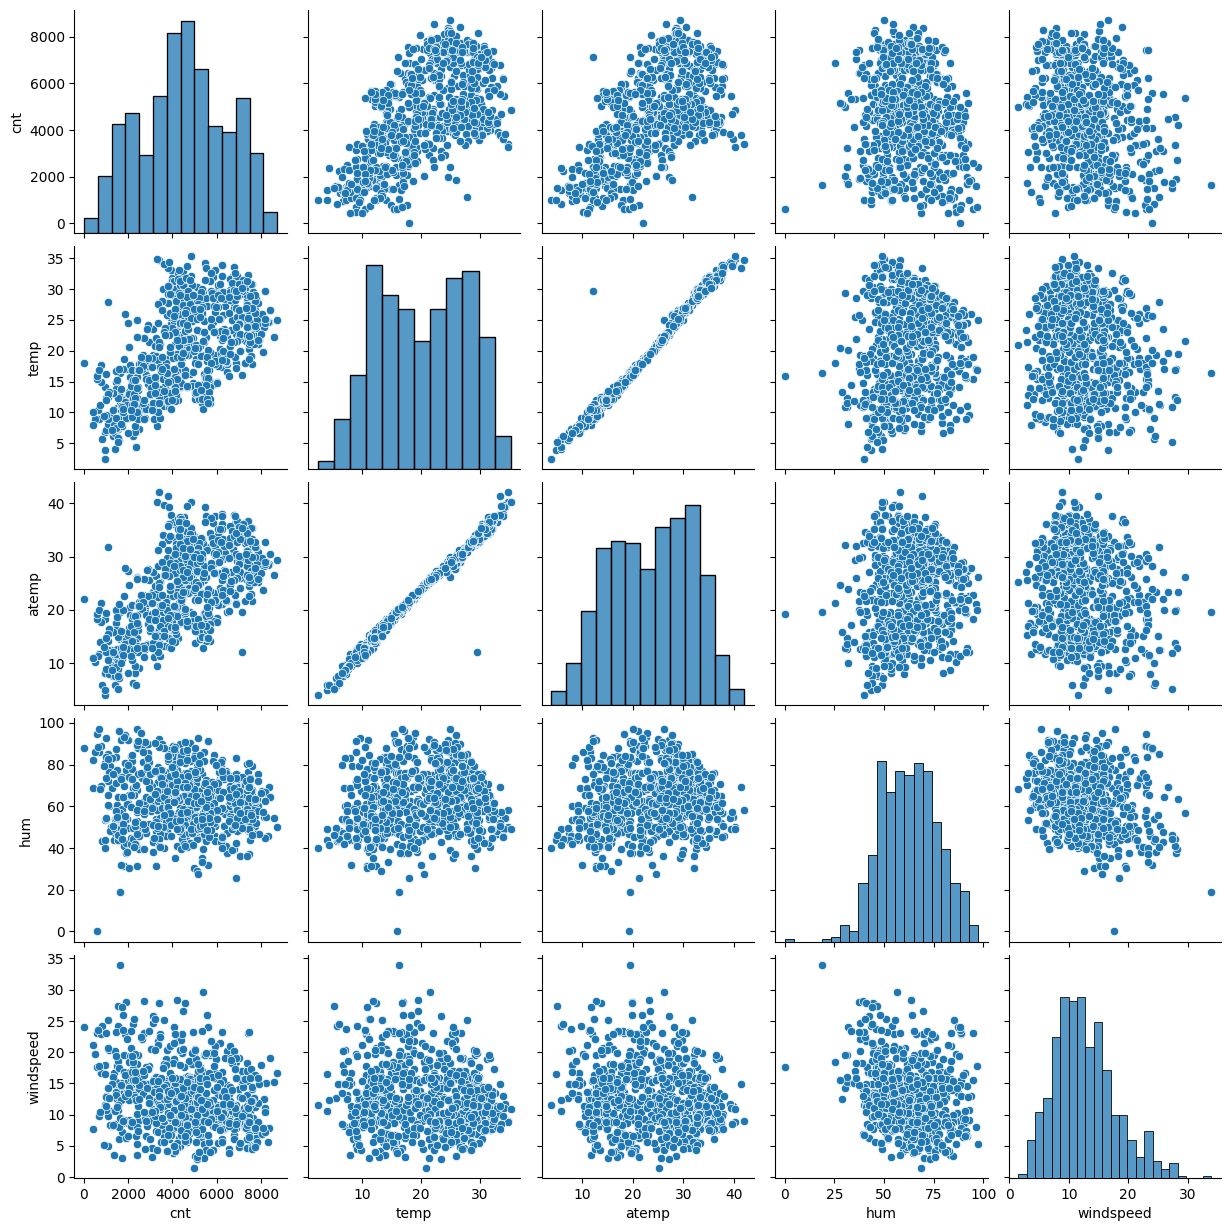

In [29]:
sns.pairplot(data=bike_share_df1, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

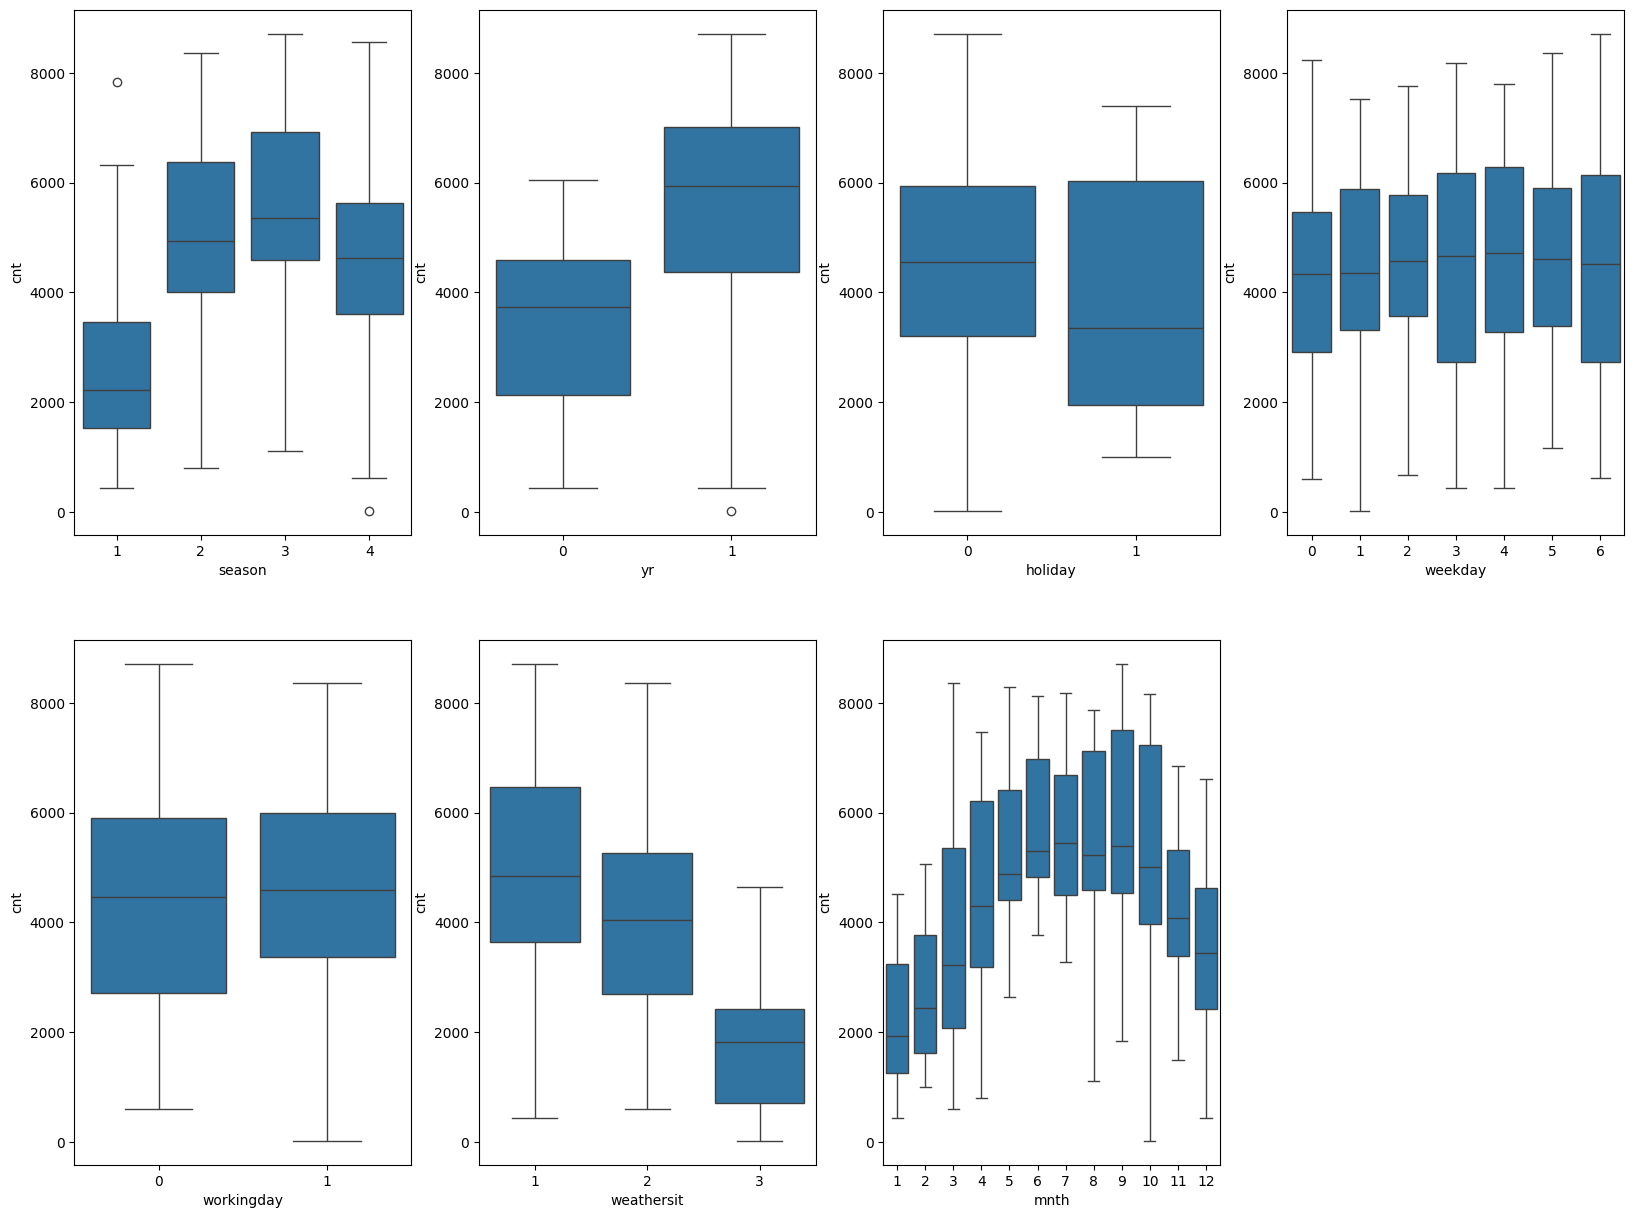

In [35]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share_df1)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share_df1)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share_df1)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share_df1)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share_df1)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share_df1)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share_df1)
plt.show()

### Remarks:
- Some variables show strong linear correlation with cnt
- Season: Demand is highest in Fall (3) and lowest in Spring (1).
- Year: 2019 shows higher rentals than 2018.
- Weekday: Rentals remain fairly consistent across the week.
- Weather: Heavy rain/snow results in almost no rentals; clear/partly cloudy days show the highest demand.
- Month: Rentals peak in September and drop significantly in December due to snowfall.
- Holiday: Fewer users rent bikes on holidays.
- Working day: Median rentals stay similar on working and non-working days, indicating minimal

## Step 3: Data Preparation - handling categorical variables and adding dummy variables


In [48]:
import calendar
bike_share_df1['mnth'] = bike_share_df1['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_share_df1['mnth']

,mnth
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan
...,...
725,Dec
726,Dec
727,Dec
728,Dec


In [49]:
bike_share_df1.season = bike_share_df1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_share_df1.weathersit = bike_share_df1.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bike_share_df1.weekday = bike_share_df1.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [50]:
bike_share_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables

The categorical variables mnth, weekday, season, and weathersit each contain multiple levels (e.g., weathersit has 3 categories and mnth has 12).
To prepare them for modeling, we will generate dummy variables for all four of these categorical features.

In [52]:
vars = bike_share_df1[['season','mnth','weekday','weathersit']]

In [53]:
vars = pd.get_dummies(vars,drop_first=True)

In [54]:
bike_share_df1 = pd.concat([vars,bike_share_df1],axis = 1)

In [60]:
bike_share_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_spring                 730 non-null    bool   
 1   season_summer                 730 non-null    bool   
 2   season_winter                 730 non-null    bool   
 3   mnth_Aug                      730 non-null    bool   
 4   mnth_Dec                      730 non-null    bool   
 5   mnth_Feb                      730 non-null    bool   
 6   mnth_Jan                      730 non-null    bool   
 7   mnth_Jul                      730 non-null    bool   
 8   mnth_Jun                      730 non-null    bool   
 9   mnth_Mar                      730 non-null    bool   
 10  mnth_May                      730 non-null    bool   
 11  mnth_Nov                      730 non-null    bool   
 12  mnth_Oct                      730 non-null    bool   
 13  mnth_

In [61]:
# Drop original columns as they are not needed anymore for analysis
bike_share_df1.drop(['season', 'mnth', 'weekday', 'weathersit'],axis=1,inplace=True)
bike_share_df1.head()


,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [64]:
bike_share_df1.info()
bike_share_df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_spring                 730 non-null    bool   
 1   season_summer                 730 non-null    bool   
 2   season_winter                 730 non-null    bool   
 3   mnth_Aug                      730 non-null    bool   
 4   mnth_Dec                      730 non-null    bool   
 5   mnth_Feb                      730 non-null    bool   
 6   mnth_Jan                      730 non-null    bool   
 7   mnth_Jul                      730 non-null    bool   
 8   mnth_Jun                      730 non-null    bool   
 9   mnth_Mar                      730 non-null    bool   
 10  mnth_May                      730 non-null    bool   
 11  mnth_Nov                      730 non-null    bool   
 12  mnth_Oct                      730 non-null    bool   
 13  mnth_

(730, 30)

In [67]:
bool_cols = bike_share_df1.select_dtypes(include='bool').columns
bike_share_df1[bool_cols] = bike_share_df1[bool_cols].astype(int)
bike_share_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_spring                 730 non-null    int64  
 1   season_summer                 730 non-null    int64  
 2   season_winter                 730 non-null    int64  
 3   mnth_Aug                      730 non-null    int64  
 4   mnth_Dec                      730 non-null    int64  
 5   mnth_Feb                      730 non-null    int64  
 6   mnth_Jan                      730 non-null    int64  
 7   mnth_Jul                      730 non-null    int64  
 8   mnth_Jun                      730 non-null    int64  
 9   mnth_Mar                      730 non-null    int64  
 10  mnth_May                      730 non-null    int64  
 11  mnth_Nov                      730 non-null    int64  
 12  mnth_Oct                      730 non-null    int64  
 13  mnth_

## Step 4: Splitting the Data into Training and Testing Sets

In [80]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_share_df1, train_size = 0.7, random_state = 100)


In [82]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


## Step 5: Rescaling

Scaling becomes important in multiple linear regression because features like cnt have much larger values than variables such as temp or atemp, which can lead to disproportionately large or small coefficients. To ensure all features are on a comparable scale and improve model evaluation, we apply rescaling techniques—here, we will use Min–Max scaling.

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [84]:
num_vars = ['cnt','hum','windspeed','temp','atemp']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [72]:
train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [85]:
train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
y_train = train.pop('cnt')
X_train = train

In [88]:
y_train.shape

(510,)

## Step 6: build a linear regression model

We will follow a hybrid strategy to build the model. First, we apply Recursive Feature Elimination (RFE) for selecting the most relevant features, and then use Statsmodels to construct and evaluate the regression model.
We begin with 15 variables, and since RFE works only with scikit-learn estimators, we use the LinearRegression model from sklearn during the feature selection step.

In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [96]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 17)
rfe = rfe.fit(X_train, y_train)

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(5)),
 ('mnth_Dec', np.True_, np.int64(1)),
 ('mnth_Feb', np.False_, np.int64(2)),
 ('mnth_Jan', np.True_, np.int64(1)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Jun', np.False_, np.int64(12)),
 ('mnth_Mar', np.False_, np.int64(13)),
 ('mnth_May', np.False_, np.int64(4)),
 ('mnth_Nov', np.True_, np.int64(1)),
 ('mnth_Oct', np.False_, np.int64(11)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_Monday', np.False_, np.int64(7)),
 ('weekday_Saturday', np.True_, np.int64(1)),
 ('weekday_Sunday', np.False_, np.int64(6)),
 ('weekday_Thrusday', np.False_, np.int64(9)),
 ('weekday_Tuesday', np.False_, np.int64(8)),
 ('weekday_Wednesday', np.False_, np.int64(10)),
 ('weathersit_Light Snow & Rain', np.True_, np.int64(1)),
 ('weathersit_Mist & Cloudy', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('holiday', np.True_,

In [99]:
X_train.columns[~rfe.support_]
columns = X_train.columns[rfe.support_]
columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [100]:
X_train_rfe = X_train[columns]


In [101]:
X_train_rfe

,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0.248216,0.577930,0.431816
79,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.462664,0.759870,0.529881


#### Adding a constant variable for statsmodel



In [102]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [104]:
X_train_lm.head()
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         510 non-null    float64
 1   season_spring                 510 non-null    int64  
 2   season_summer                 510 non-null    int64  
 3   season_winter                 510 non-null    int64  
 4   mnth_Dec                      510 non-null    int64  
 5   mnth_Jan                      510 non-null    int64  
 6   mnth_Jul                      510 non-null    int64  
 7   mnth_Nov                      510 non-null    int64  
 8   mnth_Sep                      510 non-null    int64  
 9   weekday_Saturday              510 non-null    int64  
 10  weathersit_Light Snow & Rain  510 non-null    int64  
 11  weathersit_Mist & Cloudy      510 non-null    int64  
 12  yr                            510 non-null    int64  
 13  holiday 

#### Building the first linear models using statsmodels

In [105]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.52e-190
Time:                        15:46:02   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2756      0.037      7.433      0.000       0.203       0.348
season_spring                   -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer                    0.0424      0.015      2.809      0.005       0.013       0.072
season_winter                    0.1038      0.018      5.845      0.000       0.069       0.139
mnth_Dec                        -0.0388      0.017     -2.248      0.025      -0.073      -0.005
mnth_Jan                        -0.0455      0.018     -2.548      0.011      -0.081      -0.010
mnth_Jul                        -0.0524      0.018     -2.916      0.004      -0.088      -0.017
mnth_Nov                        -0.0399      0.019     -2.152      0.032      -0.076      -0.003
mnth_Sep                         0.0737      0.017      4.430      0.000       0.041       0.106
weekday_Saturday                 0.0548      0.014      3.794      0.000       0.026       0.083
weathersit_Light Snow & Rain    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
weathersit_Mist & Cloudy        -0.0583      0.010     -5.637      0.000      -0.079      -0.038
yr                               0.2309      0.008     28.978      0.000       0.215       0.247
holiday                         -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday                       0.0444      0.011      3.870      0.000       0.022       0.067
temp                             0.4764      0.036     13.064      0.000       0.405       0.548
hum                             -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed                       -0.1879      0.025     -7.390      0.000      -0.238      -0.138
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Remarks
p-value for all the variables is < 0.05 so we keep all the columns and check VIF next


### Checking VIF


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_rfe.columns
vif_df['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]
vif_df.sort_values(by = 'VIF', ascending=False)

,Features,VIF
15,hum,31.11
14,temp,19.14
13,workingday,5.37
16,windspeed,4.78
0,season_spring,4.57
2,season_winter,4.12
1,season_summer,2.89
10,weathersit_Mist & Cloudy,2.32
11,yr,2.09
8,weekday_Saturday,2.00


#### since p values are all min we will drop higested VIF i.e hum and check

In [108]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [109]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          4.83e-188
Time:                        15:53:29   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2040      0.033      6.188      0.000       0.139       0.269
season_spring                   -0.0698      0.021     -3.304      0.001      -0.111      -0.028
season_summer                    0.0356      0.015      2.339      0.020       0.006       0.066
season_winter                    0.0901      0.018      5.095      0.000       0.055       0.125
mnth_Dec                        -0.0458      0.017     -2.627      0.009      -0.080      -0.012
mnth_Jan                        -0.0517      0.018     -2.864      0.004      -0.087      -0.016
mnth_Jul                        -0.0475      0.018     -2.609      0.009      -0.083      -0.012
mnth_Nov                        -0.0407      0.019     -2.162      0.031      -0.078      -0.004
mnth_Sep                         0.0674      0.017      4.009      0.000       0.034       0.100
weekday_Saturday                 0.0596      0.015      4.080      0.000       0.031       0.088
weathersit_Light Snow & Rain    -0.2976      0.024    -12.277      0.000      -0.345      -0.250
weathersit_Mist & Cloudy        -0.0821      0.009     -9.590      0.000      -0.099      -0.065
yr                               0.2346      0.008     29.217      0.000       0.219       0.250
holiday                         -0.0498      0.027     -1.822      0.069      -0.104       0.004
workingday                       0.0474      0.012      4.080      0.000       0.025       0.070
temp                             0.4370      0.036     12.260      0.000       0.367       0.507
windspeed                       -0.1602      0.025     -6.452      0.000      -0.209      -0.111
==============================================================================
Omnibus:                       79.557   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.036
Skew:                          -0.766   Prob(JB):                     1.23e-47
Kurtosis:                       5.796   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### check VIF for model 2

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
14,temp,7.21
13,workingday,5.34
15,windspeed,4.72
0,season_spring,3.17
2,season_winter,3.04
1,season_summer,2.34
11,yr,2.08
8,weekday_Saturday,1.99
6,mnth_Nov,1.83
4,mnth_Jan,1.68


VIF looks a lot better , temp is > 5 but lets ignore it since its not so high

## Step 7: Residual Analysis of the training data subset

In [112]:
y_train_pred = lm_2.predict(X_train_lm)

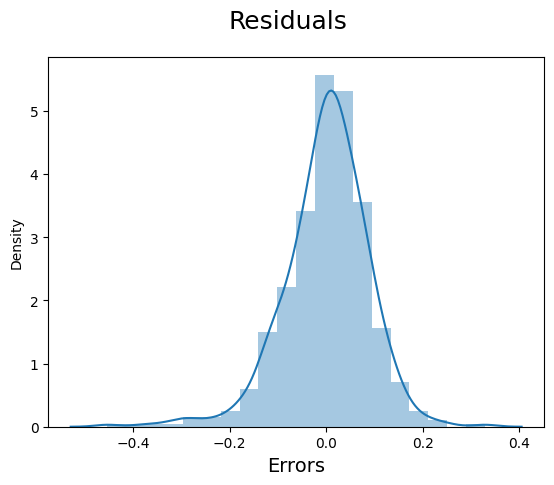

In [113]:
f = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
f.suptitle('Residuals', fontsize = 18)
plt.xlabel('Errors', fontsize = 14)
plt.show()

### Remarks
Error terms follow normal distribution and centered at 0

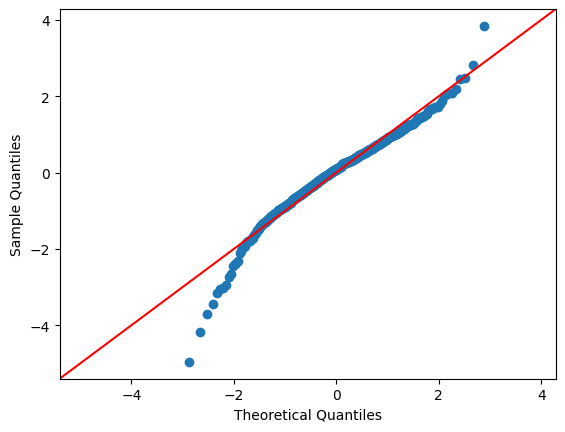

In [ ]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

## Step 8:p predict on test set with our LM2 final model

In [114]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [115]:
test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [116]:
y_test = test.pop('cnt')
X_test = test

In [117]:
# add constant and predict
X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)

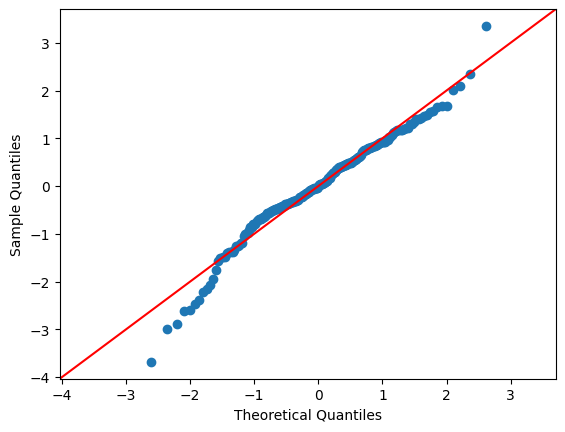

In [118]:
sm.qqplot((y_test - y_test_pred), fit=True, line='45')
plt.show()

## Step 9: Get the r-squared and model evaluation


In [119]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8454530745958233
r2_score of test dataset 0.816207804545147


The model performs consistently, with training and testing R² scores of 0.845 and 0.816 respectively, indicating it generalizes well to unseen data.

Text(0, 0.5, 'y_pred')

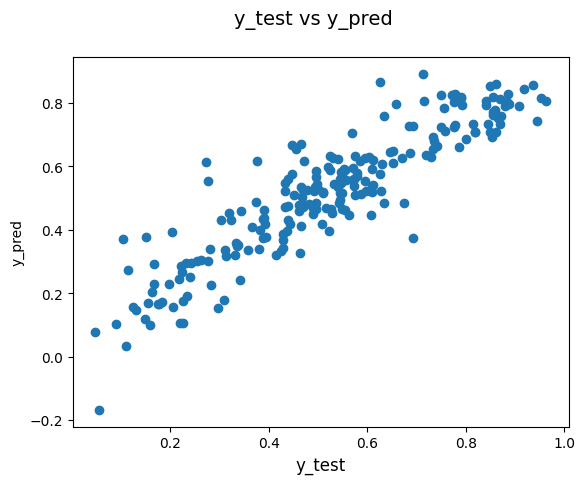

In [120]:
f = plt.figure()
plt.scatter(y_test, y_test_pred)
f.suptitle('y_test vs y_pred', fontsize = 14)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_pred', fontsize = 10)

we can conclude model is not fit by chance

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [122]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Vars',param.index)
param.rename(columns = {0:'Coefficient'},inplace = True)
param['index'] = list(range(0,17))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient',ascending = False,inplace = True)
param

,Vars,Coefficient
index,,
15,temp,0.436967
12,yr,0.234642
0,const,0.204033
3,season_winter,0.090093
8,mnth_Sep,0.067419
9,weekday_Saturday,0.059622
14,workingday,0.047400
2,season_summer,0.035602
7,mnth_Nov,-0.040667


In [123]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          4.83e-188
Time:                        16:13:36   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2040      0.033      6.188      0.000       0.139       0.269
season_spring                   -0.0698      0.021     -3.304      0.001      -0.111      -0.028
season_summer                    0.0356      0.015      2.339      0.020       0.006       0.066
season_winter                    0.0901      0.018      5.095      0.000       0.055       0.125
mnth_Dec                        -0.0458      0.017     -2.627      0.009      -0.080      -0.012
mnth_Jan                        -0.0517      0.018     -2.864      0.004      -0.087      -0.016
mnth_Jul                        -0.0475      0.018     -2.609      0.009      -0.083      -0.012
mnth_Nov                        -0.0407      0.019     -2.162      0.031      -0.078      -0.004
mnth_Sep                         0.0674      0.017      4.009      0.000       0.034       0.100
weekday_Saturday                 0.0596      0.015      4.080      0.000       0.031       0.088
weathersit_Light Snow & Rain    -0.2976      0.024    -12.277      0.000      -0.345      -0.250
weathersit_Mist & Cloudy        -0.0821      0.009     -9.590      0.000      -0.099      -0.065
yr                               0.2346      0.008     29.217      0.000       0.219       0.250
holiday                         -0.0498      0.027     -1.822      0.069      -0.104       0.004
workingday                       0.0474      0.012      4.080      0.000       0.025       0.070
temp                             0.4370      0.036     12.260      0.000       0.367       0.507
windspeed                       -0.1602      0.025     -6.452      0.000      -0.209      -0.111
==============================================================================
Omnibus:                       79.557   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.036
Skew:                          -0.766   Prob(JB):                     1.23e-47
Kurtosis:                       5.796   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Positive coefficients (e.g., temp, season_Summer) indicate that increasing these variables raises cnt, while negative coefficients show that higher values of those variables reduce cnt


The R-squared and adjusted R-squared values for both the train and test sets show that the model explains over 82% of the variation in bike demand. The coefficients highlight how each factor influences demand, and the top three contributors in the final model are: temperature (0.436967), weather conditions such as light snow or rain (-0.297579), and year (0.234642). Overall, temperature, weather/seasonal conditions, and time-related variables play a significant role in predicting shared bike demand.

## My recommendations for the company

Only September shows a noticeable increase in demand; January, July, November, and December indicate lower demand and may require targeted marketing.

Higher temperatures significantly boost demand, so the company should monitor weather trends.

Demand increases during winter, so inventory and operational readiness should be strengthened in that season.

Bike usage drops on holidays, so promotional offers or campaigns might help encourage usage.